In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#load the data
wbcd=pd.read_csv("wbcd.csv")

In [3]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
wbcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
#Predict whether tumor is being malignant or benign
# diagnosis is output column y

In [6]:
#drop the first column
wbcd.drop(["id"],inplace=True,axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder #Label Encoding for converting Categorical column to numerical one

In [8]:
number=LabelEncoder()
wbcd['diagnosis']=number.fit_transform(wbcd['diagnosis'].astype('str'))

In [9]:
wbcd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [10]:
wbcd['diagnosis'].value_counts() #0 is benign and 1 is malignant

0    357
1    212
Name: diagnosis, dtype: int64

In [11]:
#Lets Create two separate datasets for understanding distributions
Malignant_data=wbcd[(wbcd['diagnosis']!=0)]  #Malignant
Benign_data=wbcd[(wbcd['diagnosis']==0)] #Benign

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

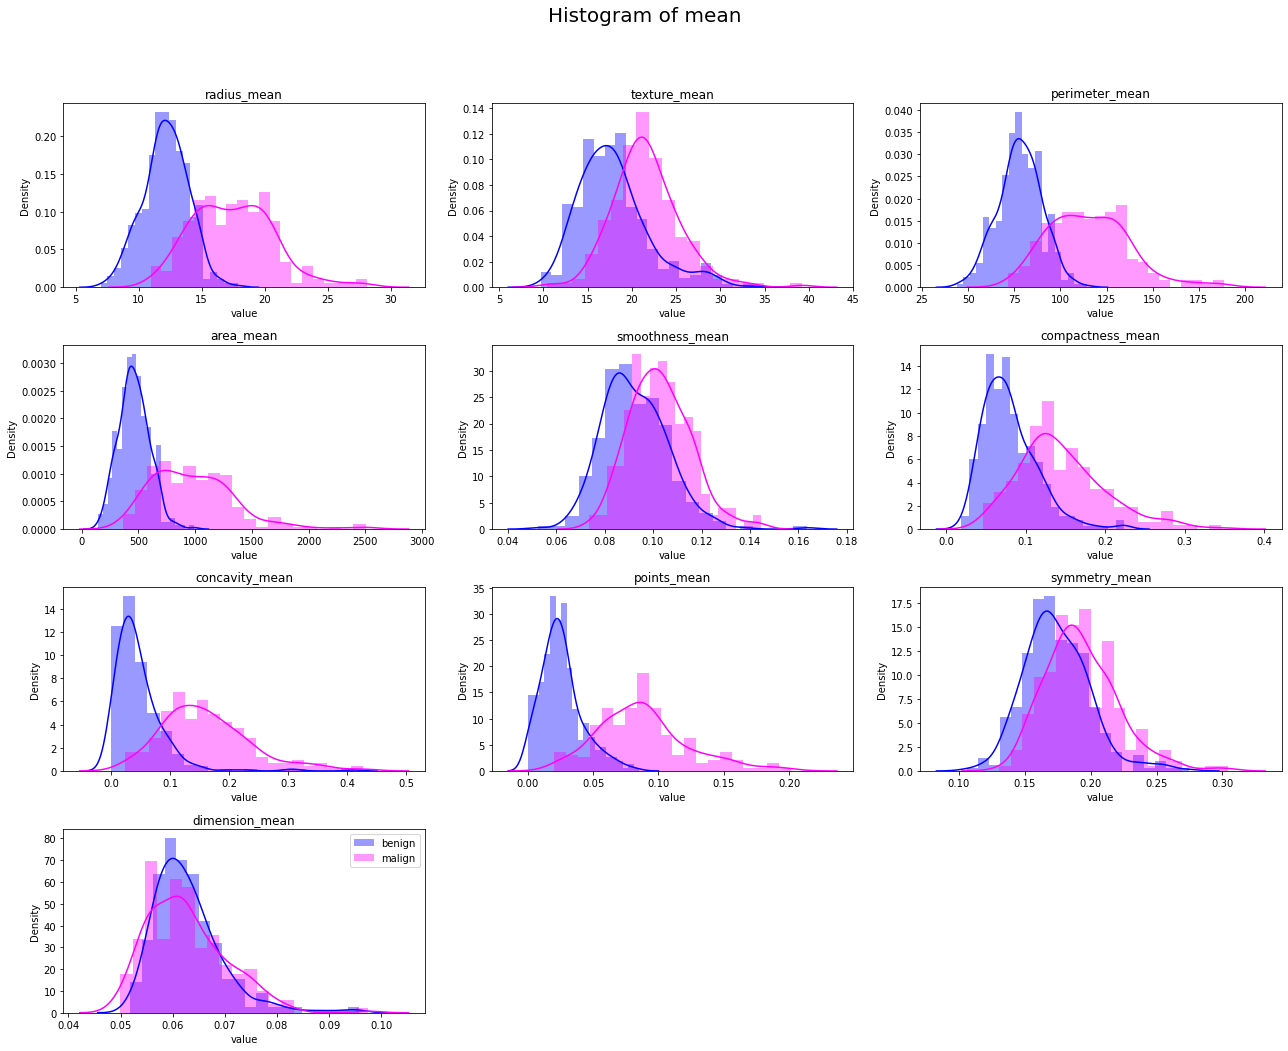

In [12]:
#Plotting Histograms 
fig=plt.figure(figsize=(18,14),tight_layout=True)

for i,b in enumerate(list(wbcd.columns[1:11])):
    i=i+1 #Enumerate starting at 0, add 1 for subplotting
    ax=fig.add_subplot(4,3,i) #Create axes object
    #Plot histogram using seaborn
    sb.distplot(Benign_data[b],label='benign',color="blue",bins=20,hist=True)
    sb.distplot(Malignant_data[b],label='malign',color="magenta",bins=20,hist=True)
    ax.set_xlabel('value')
    ax.set_title(b)
plt.suptitle('Histogram of mean',y=1.04,size=20)
plt.tight_layout()
plt.legend()
plt.show()

In [13]:
X=wbcd.iloc[:,1:] #Input features
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [14]:
Y=wbcd.iloc[:,0] #Output Features
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_stdscalar=scalar.fit_transform(X)
x_stdscalar

array([[-0.51329651, -1.60559452, -0.54037561, ..., -0.31513306,
        -0.11932056, -0.89972108],
       [-1.00180093, -0.07903849, -0.93456583, ..., -0.53820271,
         0.06348865, -0.44752801],
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       ...,
       [ 0.32738551,  0.72612674,  0.28631171, ...,  0.12171802,
         0.44366709,  0.7633076 ],
       [ 0.11437486, -1.23559085,  0.07788929, ..., -0.11733956,
        -0.47685008, -0.32395074],
       [ 2.05703196, -0.97495933,  2.03195239, ...,  1.24848623,
        -0.27624528,  0.15040866]])

In [16]:
#Lets Split it into Train, Test  data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_stdscalar,Y,test_size=0.2,random_state=0)
print('Train Set:',x_train.shape, y_train.shape)
print('Test Set:',x_test.shape, y_test.shape)

Train Set: (455, 30) (455,)
Test Set: (114, 30) (114,)


In [17]:
y_train

338    1
427    0
406    0
96     0
490    1
      ..
277    1
9      0
359    0
192    0
559    0
Name: diagnosis, Length: 455, dtype: int32

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.score(x_train,y_train)

0.9912087912087912

In [20]:
knn.score(x_test,y_test)

0.9649122807017544

In [21]:
from sklearn.metrics import accuracy_score,classification_report

In [22]:
print("\nTrain Confusion Matrix\n")
pd.crosstab(y_train,knn.predict(x_train),rownames=["Actual"],colnames=["Predicted"])


Train Confusion Matrix



Predicted,0,1
Actual,,
0,280,0
1,4,171


In [23]:
print("\n Accuracy of Train data is",round(accuracy_score(y_train,knn.predict(x_train)),3))


 Accuracy of Train data is 0.991


In [24]:
print("\nClassification report of Train Data\n")
print(classification_report(y_train,knn.predict(x_train)))


Classification report of Train Data

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       280
           1       1.00      0.98      0.99       175

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [25]:
print("\nTest Confusion Matrix\n")
pd.crosstab(y_test,knn.predict(x_test),rownames=["Actual"],colnames=["Predicted"])


Test Confusion Matrix



Predicted,0,1
Actual,,
0,76,1
1,3,34


In [26]:
print("\n Accuracy of Test data is",round(accuracy_score(y_test,knn.predict(x_test)),3))


 Accuracy of Test data is 0.965


In [27]:
print("\nClassification report of Test Data\n")
print(classification_report(y_test,knn.predict(x_test)))


Classification report of Test Data

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.97      0.92      0.94        37

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



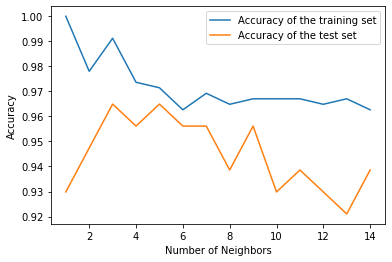

In [34]:
training_accuracy=[]
test_accuracy=[]
#try KNN for different K nearest neighbor from 1 to 15
neighbors_count=range(1,15)

for n_neighbors in neighbors_count:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(accuracy_score(y_train,knn.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
plt.plot(neighbors_count,training_accuracy,label='Accuracy of the training set')
plt.plot(neighbors_count,test_accuracy,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
    

In [37]:
wbcd.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')